In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from dt import DecisionTreeClassifier
import random

In [10]:
df = pd.read_csv('C:\\Users\\Kemal\\Downloads\\Iris.csv')
df = df.drop("Id", axis = 1)
df_columns = df.columns.tolist()
list = df.values.tolist()

# Exploratory Data Analysis


In [ ]:
df["Species"].value_counts()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='SepalLengthCm', data = df)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y='SepalWidthCm', data = df)
plt.subplot(2,2,3)
sns.boxplot(x='Species', y='PetalLengthCm', data = df)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y='PetalWidthCm', data = df)
plt.show()

In [ ]:
df.hist(figsize=(12,8),bins=20)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.show()

In [ ]:
sns.pairplot(df, hue="Species", height = 3)

In [ ]:
df.groupby('Species').agg(['mean', 'median'])

In [ ]:
df.isna().sum()

# Training Of The Classifier 

In [17]:
def train_test(df, test_size):
    index = df.index.tolist()
    test_idx = random.sample(population=index, k = test_size)
    test_df = df.loc[test_idx]
    train_df = df.drop(test_idx)
    return train_df, test_df

In [18]:
train_df, test_df = train_test(df, test_size = 20)
train_list = train_df.values.tolist()
train_list_with_columns = train_df.values.tolist()
train_list_with_columns.insert(0, df_columns)
test_list = test_df.values.tolist()

In [19]:
dtc = DecisionTreeClassifier(4)

In [20]:
tree = dtc.fit(train_list_with_columns,[])

# Interpretation Of The Results

In [21]:
species, classification = dtc.predict(test_list)

Confusion Matrix :  [[5, 0, 0], [0, 5, 1], [0, 1, 8]]
Iris-setosa presicion :  1.0
Iris-virginica presicion :  0.8333333333333334
Iris-versicolor presicion :  0.8888888888888888
Iris-setosa recall :  1.0
Iris-virginica recall :  0.8333333333333334
Iris-versicolor recall :  0.8888888888888888
Iris-setosa F1-Score :  1.0
Iris-virginica F1-Score :  0.8333333333333334
Iris-versicolor F1-Score :  0.8888888888888888
Accuracy :  90.0


[2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0]
[2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0]


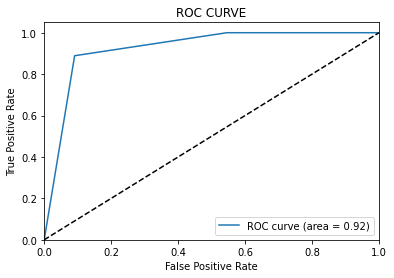

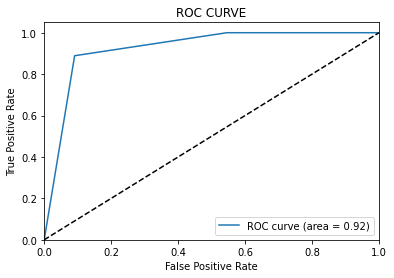

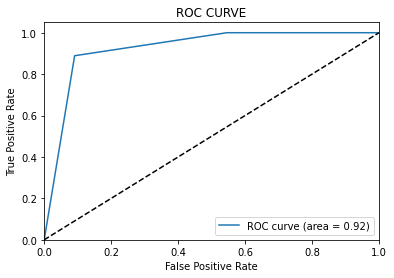

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
    
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (len(species)):
    if species[i] == "Iris-setosa":
        species[i] = 0
    if species[i] == "Iris-virginica":
        species[i] = 1
    if species[i] == "Iris-versicolor":
        species[i] = 2
        
for i in range (len(classification)):
    if classification[i] == "Iris-setosa":
        classification[i] = 0
    if classification[i] == "Iris-virginica":
        classification[i] = 1
    if classification[i] == "Iris-versicolor":
        classification[i] = 2
print(species)
print(classification)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(species, classification, pos_label=species[0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()